<a href="https://colab.research.google.com/github/Lara-Amelia/ICD-2025-2/blob/main/sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 9 - Gradiente Descendente (*Gradient Descent*)

## Introdução

In [1]:
# -*- coding: utf8

from scipy import stats as ss

import matplotlib.pyplot as plt
from numpy.testing import assert_equal
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()
plt.style.use('tableau-colorblind10')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

Ao fazer ciência de dados é comum se deparar com casos onde buscamos um melhor modelo. Diferente dos testes de hipóteses, onde buscamos a chance dos nossos dados em um modelo. Aqui, estamos tentando encontrar o melhor modelo para uma determinada situação. Geralmente "melhor" significará algo como "minimiza o erro do modelo" ou "maximiza a verossimilhaça dos dados".

Para casos simples, como na regressão linear, é possível achar o melhor modelo usando cálculo. Porém, em casos particulares, precisamos achar tal modelo na marra. Nossa abordagem será uma técnica chamada gradiente descendente, que funciona muito bem para diferentes cenário. Gradiente descendente é a base da maioria dos __frameworks__ de aprendizado de máquina. Você pode não achar isso super excitante por si só, mas ao combinar gradiente descendente com modelos complexos temos a fórmula do sucesso de aprendizando hoje em dia.

## A ideia por trás do gradiente descendente

Vamos focar no caso de regressão linear com dados z-normalizados. Aqui, temos um modelo muito simples:

$$y_i = \beta x_i + \epsilon_i$$

Sabemos tratar o mesmo de um ponto de vista de mínimos quadrados como também de máxima verossimilhança. Vamos explorar uma base onde queremos prever o comprimento dos narizes de Kangaroos. Para isto vamos usar uma feature fantástica, a largura do nariz do Canguru.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/gray-kangaroos.csv', names=['comprimento', 'largura'], header=0)
df.head()

,comprimento,largura
0,609,241
1,629,222
2,620,233
3,564,207
4,645,247


Abaixo temos o modelo.

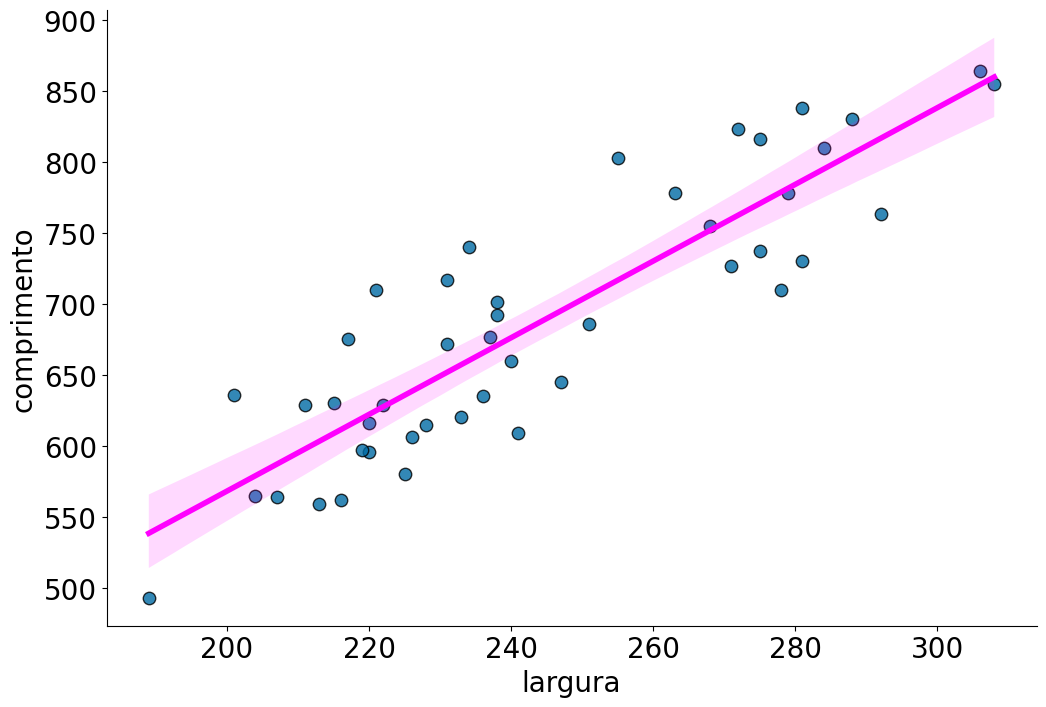

In [5]:
sns.regplot(x='largura', y='comprimento', data=df, n_boot=10000,
            line_kws={'color':'magenta', 'lw':4},
            scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
despine()

Z-normalizando temos:

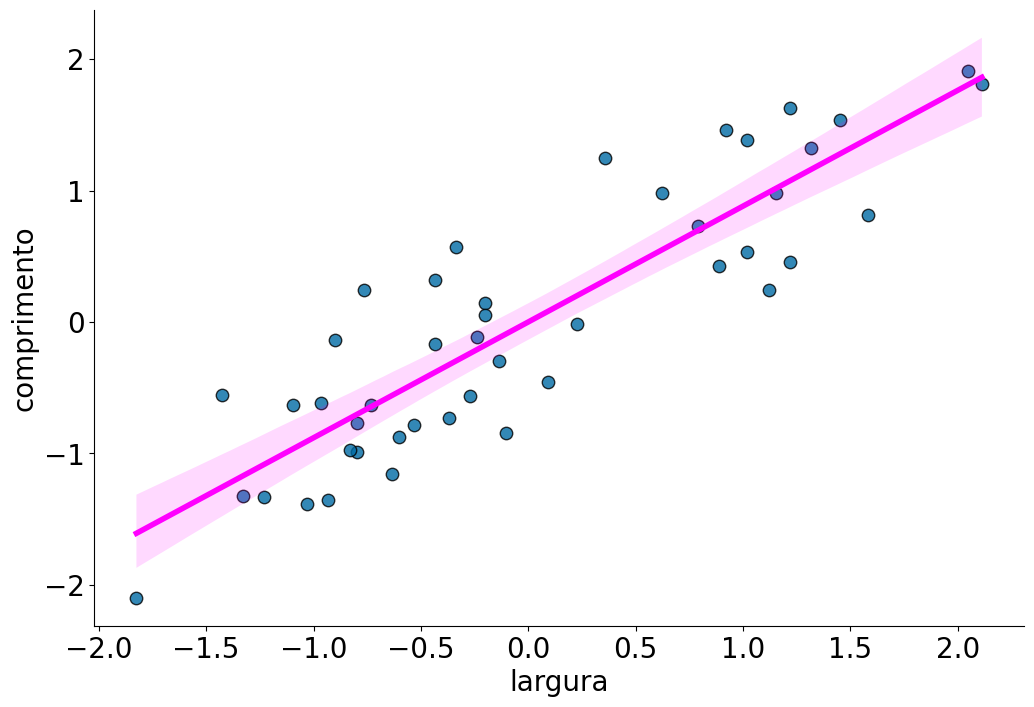

In [6]:
df -= df.mean()
df /= df.std(ddof=1)
sns.regplot(x='largura', y='comprimento', data=df, n_boot=10000,
            line_kws={'color':'magenta', 'lw':4},
            scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
despine()

Por fim, a regressão. Note o intercepto igual a 0.

In [7]:
y = df['comprimento']
x = df['largura']
ss.linregress(x, y)

LinregressResult(slope=np.float64(0.8814144365382701), intercept=np.float64(5.560934949938166e-16), rvalue=np.float64(0.8814144365382703), pvalue=np.float64(1.3423645343535288e-15), stderr=np.float64(0.07203174220550969), intercept_stderr=np.float64(0.07122689300898212))

Abaixo temos um plot com a soma dos erros ao quadrado que é utilizado para chegar na reta. Lembre-se das aulas anteriores. Chegamos no resultado acima usando cálculo, isto é, setamos as derivadas para zero. Uma outra abordagem para minimizar o erro é escolher um ponto de partida aleatório. Deste, calculamos o gradiente (derivadas). Depois, damos um pequeno passo na oposta do gradiente.

Inicialmente, observe como o erro é para um ponto. Lembrando que estamos trabalhando com uma função de erros quadrado. Diferente das aulas anteriores, ao invés de somar a mesma vamos tirar a média. Como o número de pontos, $n$, é uma constante, não afeta nossos algoritmos. Ao setar a derivada para zero o n some. De qualquer forma, pode ajudar os nossos algoritmos (evitar overflow).

$L(\beta) = n^{-1} \sum_i (y_i - \beta x_i)^2$

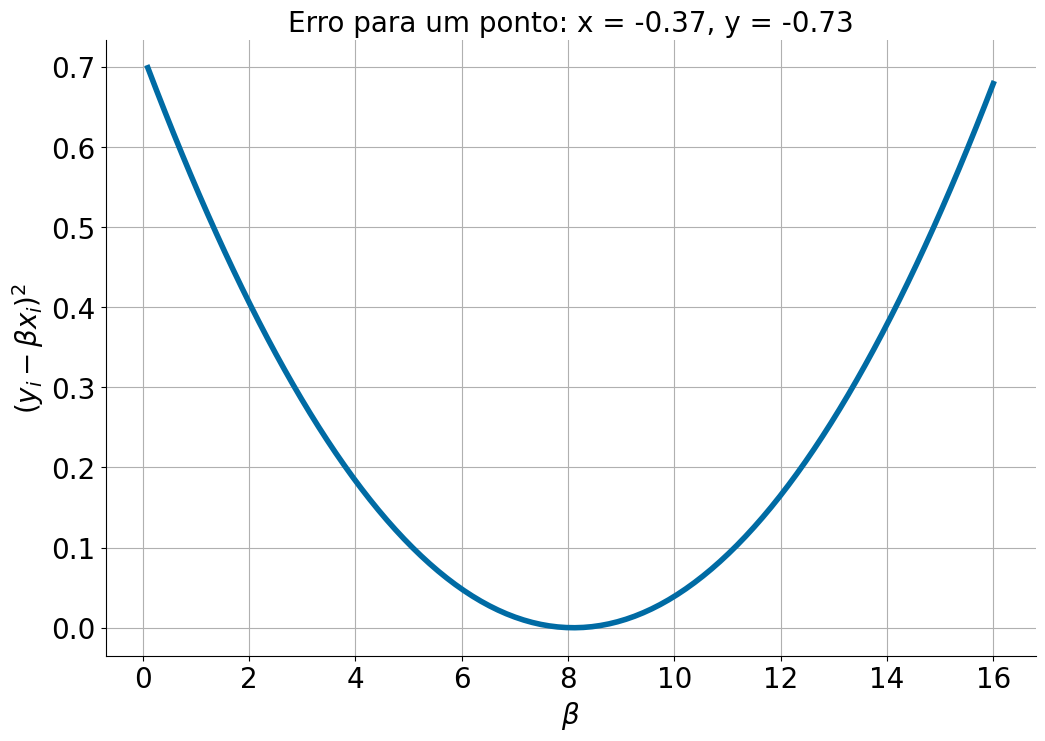

In [8]:
betas = np.linspace(0.1, 16, 100)
errs = np.zeros_like(betas)
for j in range(len(betas)):
    err = ((y[0] - betas[j] * x[0]) ** 2).mean()
    errs[j] = err
plt.plot(betas, errs, label='L(beta)')
plt.xlabel(r'$\beta$')
plt.title(r'Erro para um ponto: x = {:.2f}, y = {:.2f}'.format(x[2], y[2]))
plt.ylabel(r'$(y_i - \beta x_i)^2$')
plt.grid()
despine()

A soma de duas funções convexas é convexa. Então, a soma do erro quadrado nos pontos tamém é convexa.

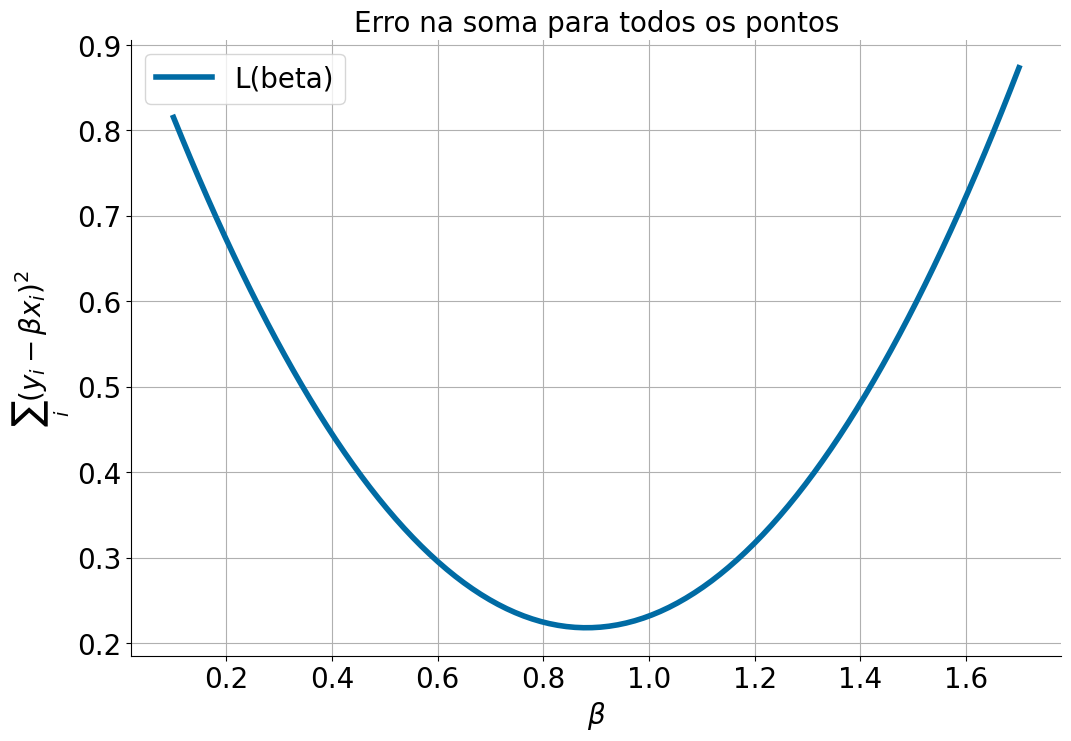

In [9]:
betas = np.linspace(0.1, 1.7, 100)
errs = np.zeros_like(betas)
grads = np.zeros_like(betas)
for j in range(len(betas)):
    err = ((y - betas[j] * x) ** 2).mean()
    grads[j] = (-2 * (y - betas[j] * x) * x).mean()
    errs[j] = err
plt.plot(betas, errs, label='L(beta)')
# plt.plot(betas, grads, label='L\'(beta)')
plt.xlabel(r'$\beta$')
plt.title(r'Erro na soma para todos os pontos')
plt.ylabel(r'$\sum_i(y_i - \beta x_i)^2$')
plt.legend()
plt.grid()
despine()

Observe que essa função possui um ponto de mínimo quando $\beta \approx 0.9$.  Observe que o gradiente, ou a derivada, é negativa quando estamos do lado esquero do mínimo. É positiva do lado direto e zero no valor ótimo. Então, a partir de um local inicial o sinal da derivada, na verdade o oposto do sinal como estamos minimizando, indica a direção que devemos ir.

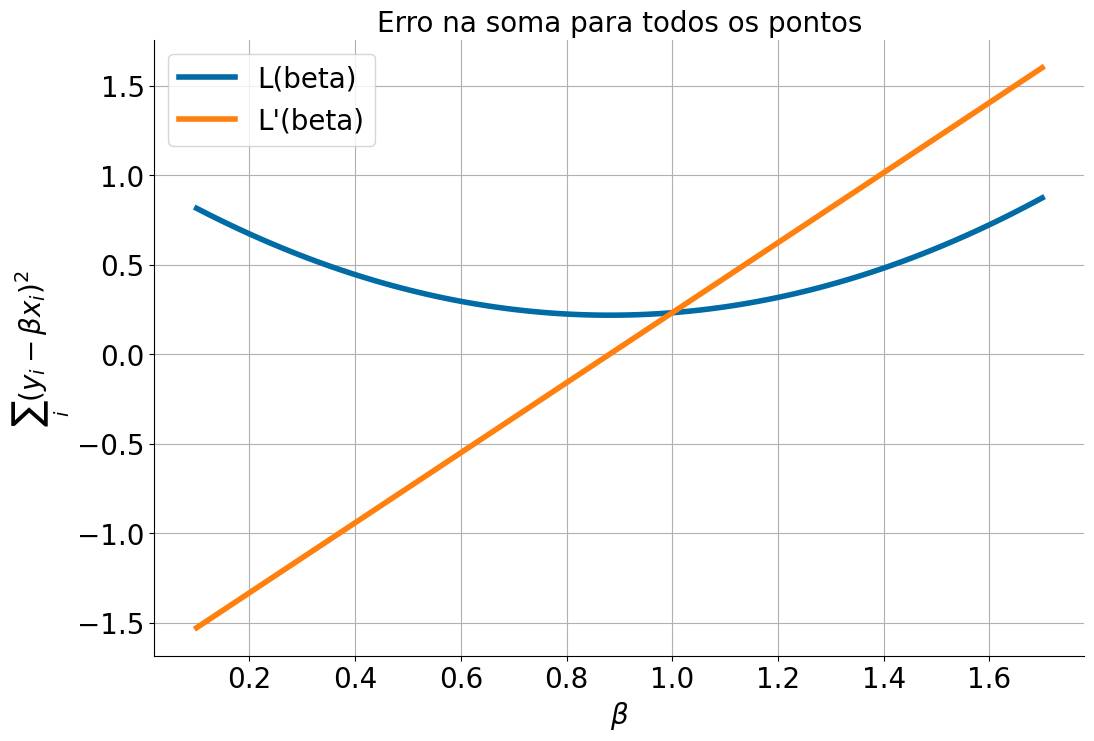

In [10]:
plt.plot(betas, errs, label='L(beta)')
plt.plot(betas, grads, label='L\'(beta)')
plt.xlabel(r'$\beta$')
plt.title(r'Erro na soma para todos os pontos')
plt.ylabel(r'$\sum_i(y_i - \beta x_i)^2$')
plt.legend()
plt.grid()
despine()

## Gradiente Descendente

Com o conhecimento acima temos a base do Gradiente Descendente. Iniciando de um local qualquer, $\beta=2$. Vamos:

1. Computar a derivada $\frac{dL(\beta)}{d\beta}$
1. Setar $\beta = \beta - \lambda \frac{dL(\beta)}{d\beta}$
1. Repetir

O valor de $\lambda$ define nossa taxa de aprendizado.

In [11]:
def ssq_znormed(x, y, beta):
    return ((y - beta * x) ** 2).mean()

In [12]:
def grad_znormed(x, y, beta):
    return (-2 * x * (y - beta * x)).mean()

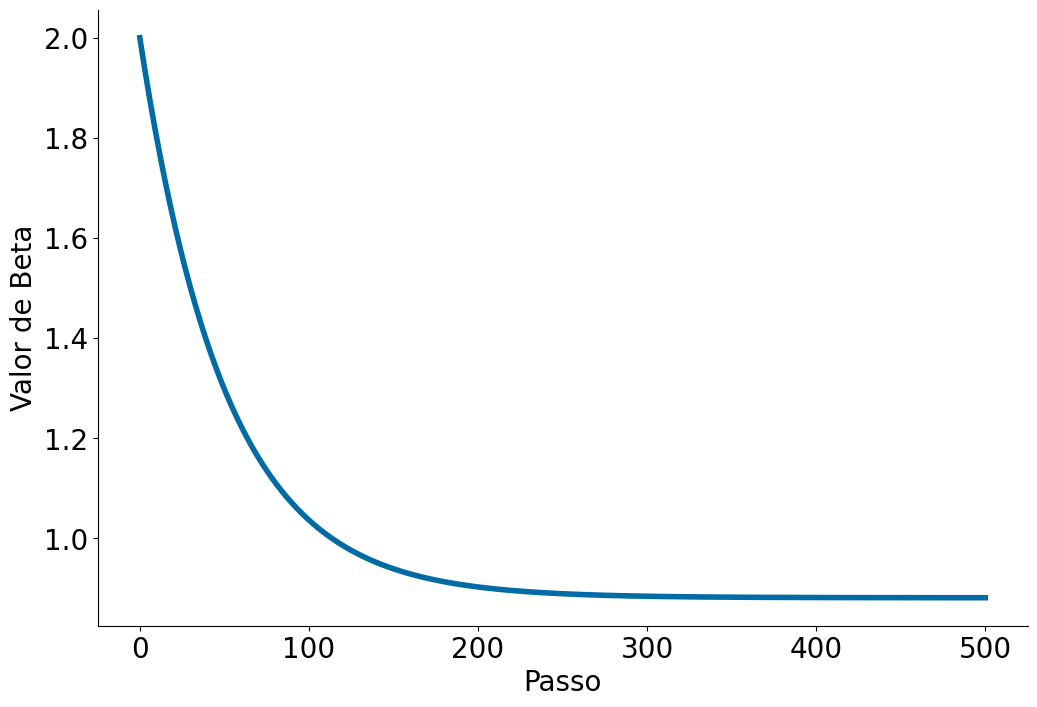

In [13]:
beta = 2
beta_passo = [beta]
erros = []
for _ in range(500):
    err_sq = ssq_znormed(x, y, beta)
    grad = grad_znormed(x, y, beta)
    beta = beta - 0.01 * grad
    beta_passo.append(beta)
    erros.append(err_sq)
plt.plot(beta_passo)
plt.xlabel('Passo')
plt.ylabel('Valor de Beta')
despine()

Observe os erros

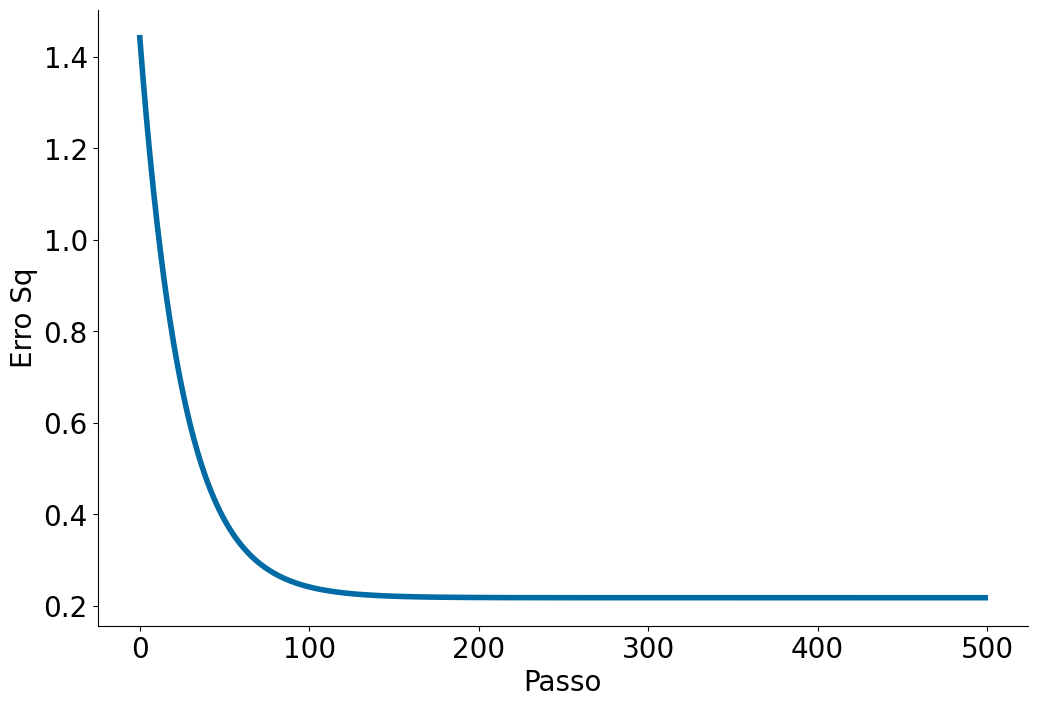

In [14]:
plt.plot(erros)
plt.xlabel('Passo')
plt.ylabel('Erro Sq')
despine()

## Gradiente Descendente Estocástico

Muitas vezes usaremos o gradiente descendente para escolher os parâmetros de um modelo de maneira a minimizar alguma noção de erro. Usando a abordagem em lote anterior, cada etapa do método exige que façamos uma previsão e calculemos o gradiente para todo o conjunto de dados, o que faz com que cada etapa demore muito.

Geralmente, essas funções de erro são *aditivas*, o que significa que o erro preditivo em todo o conjunto de dados é simplesmente a soma dos erros preditivos para cada ponto de dados.

Quando este é o caso, podemos, em vez disso, aplicar uma técnica chamada gradiente descendente estocástico (ou *stochastic gradient descent*), que calcula o gradiente (e dá um passo) para apenas um ponto por vez. Ele passa sobre os dados repetidamente até atingir um ponto de parada.

Durante cada ciclo, queremos iterar nossos dados em uma ordem aleatória:

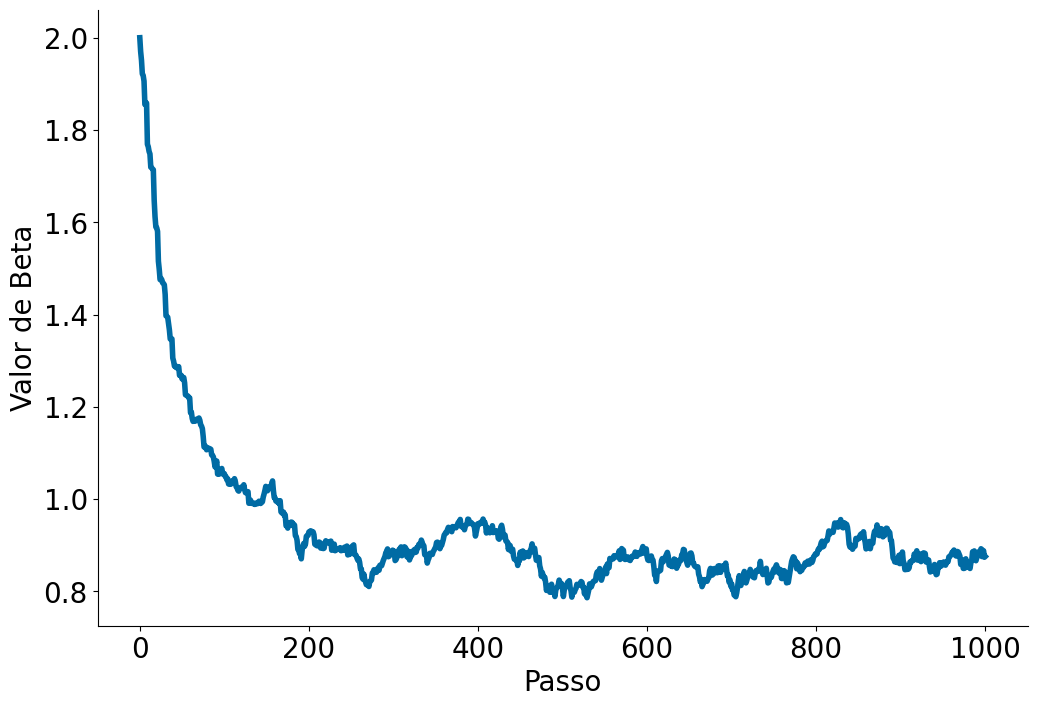

In [15]:
beta = 2
beta_passo = [beta]
erros = []
for _ in range(1000):
    i = np.random.randint(0, len(x))
    x_i, y_i = x[i], y[i]
    err_sq = ssq_znormed(x, y, beta) # esta linha ainda precisa ser em todos os pontos
    grad = grad_znormed(x_i, y_i, beta)
    beta = beta - 0.01 * grad
    beta_passo.append(beta)
    erros.append(err_sq)
plt.plot(beta_passo)
plt.xlabel('Passo')
plt.ylabel('Valor de Beta')
despine()

Observe os erros

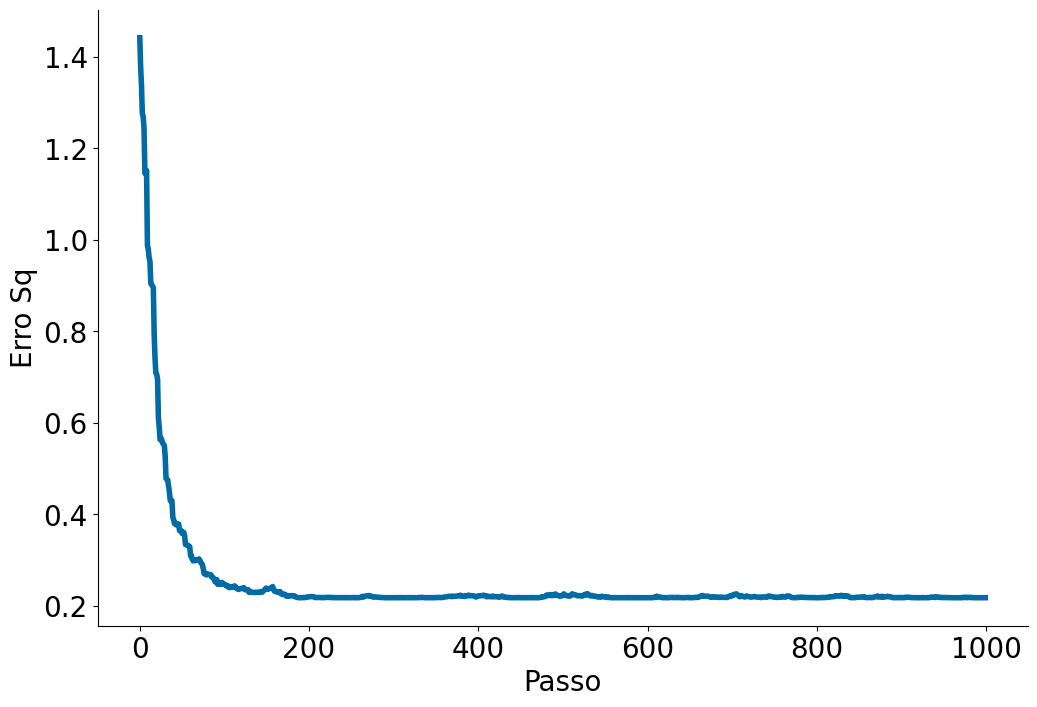

In [16]:
plt.plot(erros)
plt.xlabel('Passo')
plt.ylabel('Erro Sq')
despine()

## Escolhendo o tamanho certo do passo

Embora o raciocínio para se mover na direção oposta ao gradiente seja claro, até que ponto mover-se não é. De fato, escolher o tamanho certo do passo que devemos nos mover é mais uma arte do que uma ciência. Opções populares incluem:

  Usar um tamanho de passo fixo;

  Diminuir gradualmente o tamanho do passo ao longo do tempo;

  Em cada etapa, escolha o tamanho do passo que minimiza o valor da função objetivo.

O último parece ótimo, mas é, na prática, um cálculo caro. Podemos aproximá-lo tentando uma variedade de tamanhos de passo e escolhendo aquele que resulta no menor valor da função objetivo:

## Caso Multivariado

Até agora estamos roubando um pouco ao normalizar os dados. Isto é, estamos forçando $\alpha=0$ na equação abaixo:

$$y_i = \beta x_i + \alpha$$

Vamos voltar para os dados originais. Note que o resultado da regressão é outro. Em particular, o intercepto é 2.988. Queremos estimar o mesmo também.

In [17]:
np.random.seed(2)
x = np.random.normal(size=1000)
y = 2 * x + np.random.normal(loc=3, size=1000)
ss.linregress(x, y)

LinregressResult(slope=np.float64(1.9882667546401627), intercept=np.float64(2.988733650087046), rvalue=np.float64(0.8987666352678911), pvalue=np.float64(0.0), stderr=np.float64(0.03070153362521496), intercept_stderr=np.float64(0.030870733547685204))

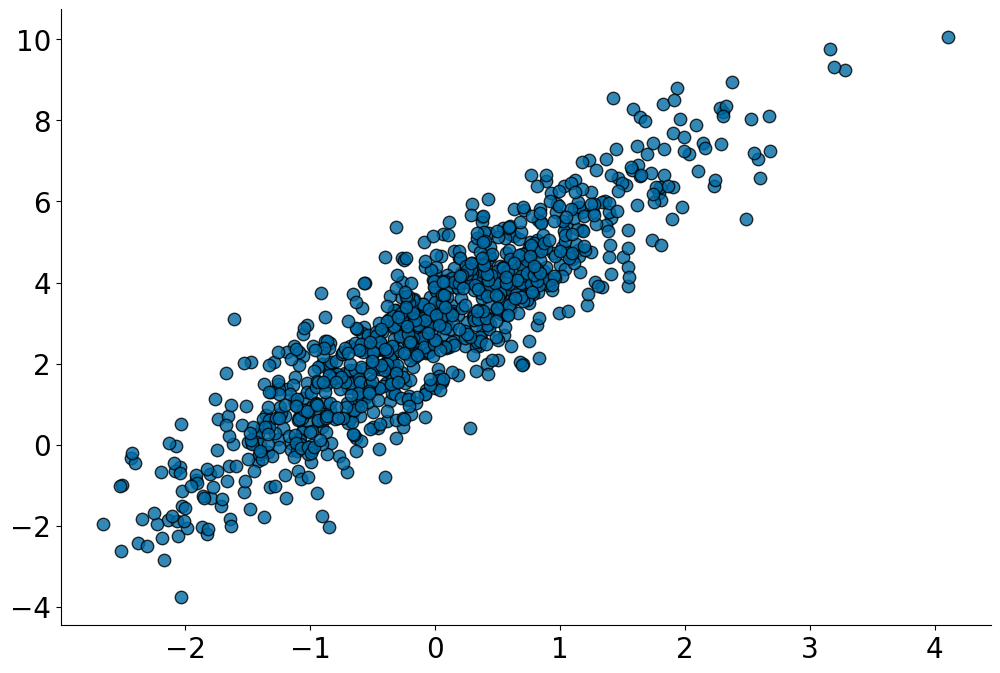

In [18]:
plt.scatter(x, y, alpha=0.8, s=80, edgecolors='k')
despine()

Abaixo tenho as derivadas:

$$\frac{dL}{d\alpha} = n^{-1}\sum_i 2 (-y_i + \beta x_i + \alpha)$$

$$\frac{d L}{d\beta} =n^{-1} \sum_i 2 (-y_i + \beta x_i + \alpha) x_i$$

In [19]:
def derivadas_regressao(parametros, x, y):
    alpha, beta = parametros
    da = (-2 * y) + (2 * beta * x) + (2 * alpha)
    db = (-2 * y * x) + (2 * beta * (x ** 2)) + (2 * alpha * x)
    return np.array([da.mean(), db.mean()])

Um gradiente descendente simples vai parar de executar quando os parâmetros convergem. Aqui temos uma função mais organizada. A mesma recebe uma outra função de derivada.

In [20]:
def gd(parametros, d_fun, x, y, lambda_=0.01):
    parametros = parametros.copy()
    for i in range(1000):
        grad = d_fun(parametros, x, y)
        parametros_novos = parametros - lambda_ * grad
        if np.abs(parametros - parametros_novos).mean() <= 0.00001:
            break
        parametros = parametros_novos
        print('Iter {}; alpha, beta = '.format(i), parametros)
    return parametros

Resposta!

In [21]:
parametros_iniciais = np.array([1, 1])
gd(parametros_iniciais, derivadas_regressao, x, y)

Iter 0; alpha, beta =  [1.0388289  1.01808058]
Iter 1; alpha, beta =  [1.07689853 1.03583271]
Iter 2; alpha, beta =  [1.11422376 1.0532623 ]
Iter 3; alpha, beta =  [1.15081916 1.07037517]
Iter 4; alpha, beta =  [1.18669902 1.08717702]
Iter 5; alpha, beta =  [1.22187737 1.10367346]
Iter 6; alpha, beta =  [1.25636795 1.11986999]
Iter 7; alpha, beta =  [1.29018421 1.13577202]
Iter 8; alpha, beta =  [1.32333936 1.15138485]
Iter 9; alpha, beta =  [1.35584635 1.1667137 ]
Iter 10; alpha, beta =  [1.38771787 1.1817637 ]
Iter 11; alpha, beta =  [1.41896636 1.19653987]
Iter 12; alpha, beta =  [1.44960403 1.21104715]
Iter 13; alpha, beta =  [1.47964282 1.22529041]
Iter 14; alpha, beta =  [1.50909447 1.23927439]
Iter 15; alpha, beta =  [1.53797047 1.25300379]
Iter 16; alpha, beta =  [1.56628209 1.26648321]
Iter 17; alpha, beta =  [1.59404037 1.27971714]
Iter 18; alpha, beta =  [1.62125616 1.29271004]
Iter 19; alpha, beta =  [1.64794006 1.30546626]
Iter 20; alpha, beta =  [1.67410249 1.31799006]
It

array([2.98811793, 1.98783919])

Observe como alpha é o intercept e beta o slope da regressão com scipy

In [22]:
ss.linregress(x, y)

LinregressResult(slope=np.float64(1.9882667546401627), intercept=np.float64(2.988733650087046), rvalue=np.float64(0.8987666352678911), pvalue=np.float64(0.0), stderr=np.float64(0.03070153362521496), intercept_stderr=np.float64(0.030870733547685204))

## Gradiente Ascendente

Vamos agora chegar no mesmo resultado usando Gradiente Ascendente. Em particular, ainda vamos nos manter em uma regressão linear. Porém, queremos maximizar a log-verossimilhança. Da aula anterior, nosso modelo é:

$$y_i = \beta x_i + \alpha + \epsilon_i $$
$$\epsilon_i = y_i - \beta x_i - \alpha $$
$$\epsilon_i \sim Normal(0, \sigma) $$

Partindo do mesmo chegamos em:

$$p(\epsilon_i\mid \sigma^2, \alpha, \beta) = \frac{1}{{\sqrt {\sigma ^22\pi } }}
e^{- ({y_i - \beta x_i - \alpha })^2 / 2\sigma^2} $$


Assumindo que cada erro é independente, a verossimilhança de todos os erros é:

$$p_{\Theta}(E) = \prod_{i} p_{\Theta}(\epsilon_i) \\
\log(p_{\Theta}(E)) = \mathcal{l}_{\Theta}(E) =  \sum_{i} \log(p_{\Theta}(\epsilon_i))$$

O log da mesma é:

$$\mathcal{l}_{\Theta}(E) =  -n \log(\sqrt{2\pi}) - n{\log(\sigma) } - { \sum^n_{i=1} ({y_i - \beta x_i - \alpha })^2 \over 2\sigma^2} $$

A derivada em $\sigma$ é:

$${d \mathcal{l}_{\Theta} \over d\sigma} =  -{n\over \sigma} + { 2 \sum^n_{i=1} ({y_i - \beta x_i - \alpha })^2 \over 2\sigma^3}$$

A derivada em $\alpha$ e $\beta$ é a mesma de antes, apenas invertemos o sinal:

$$\frac{d\mathcal{l}_{\Theta}}{d\alpha} = -n^{-1} \sum_i 2 (-y_i + \beta x_i + \alpha)$$

$$\frac{d\mathcal{l}_{\Theta}}{d\beta} = -n^{-1} \sum_i 2 (-y_i + \beta x_i + \alpha) x_i$$

Em outras palavras, vamos chegar no mesmo resultado.

In [23]:
def derivadas_vero(parametros, x, y):
    alpha, beta = parametros
    da = -1 * ((-2 * y) + (2 * beta * x) + (2 * alpha))
    db = -1 * ((-2 * y * x) + (2 * beta * (x ** 2)) + (2 * alpha * x))
    return np.array([da.mean(), db.mean()])

In [24]:
def ga(parametros, d_fun, x, y, lambda_=0.01):
    parametros = parametros.copy()
    print('Iter {}; alpha, beta = '.format(-1), parametros)
    for i in range(1000):
        grad = d_fun(parametros, x, y)
        parametros_novos = parametros + lambda_ * grad
        if np.abs(parametros - parametros_novos).mean() <= 0.00001:
            break
        parametros = parametros_novos
        print('Iter {}; alpha, beta = '.format(i), parametros)
    return parametros

In [25]:
parametros_iniciais = np.array([0.1, 0.1])
parametros = ga(parametros_iniciais, derivadas_vero, x, y)

Iter -1; alpha, beta =  [0.1 0.1]
Iter 0; alpha, beta =  [0.1559676  0.13541823]
Iter 1; alpha, beta =  [0.21084975 0.17017382]
Iter 2; alpha, beta =  [0.26466752 0.20427914]
Iter 3; alpha, beta =  [0.31744157 0.23774632]
Iter 4; alpha, beta =  [0.36919216 0.27058726]
Iter 5; alpha, beta =  [0.41993917 0.30281365]
Iter 6; alpha, beta =  [0.46970209 0.33443695]
Iter 7; alpha, beta =  [0.51850001 0.36546842]
Iter 8; alpha, beta =  [0.56635166 0.3959191 ]
Iter 9; alpha, beta =  [0.61327543 0.42579983]
Iter 10; alpha, beta =  [0.65928931 0.45512125]
Iter 11; alpha, beta =  [0.70441098 0.48389379]
Iter 12; alpha, beta =  [0.74865775 0.5121277 ]
Iter 13; alpha, beta =  [0.79204661 0.53983303]
Iter 14; alpha, beta =  [0.8345942  0.56701966]
Iter 15; alpha, beta =  [0.87631686 0.59369726]
Iter 16; alpha, beta =  [0.91723059 0.61987535]
Iter 17; alpha, beta =  [0.9573511  0.64556324]
Iter 18; alpha, beta =  [0.99669379 0.67077008]
Iter 19; alpha, beta =  [1.03527374 0.69550487]
Iter 20; alpha, 

In [26]:
ss.linregress(x, y)

LinregressResult(slope=np.float64(1.9882667546401627), intercept=np.float64(2.988733650087046), rvalue=np.float64(0.8987666352678911), pvalue=np.float64(0.0), stderr=np.float64(0.03070153362521496), intercept_stderr=np.float64(0.030870733547685204))

## Exercícios

### Close Nova Dataset

Atualmente, uma das teorias mais aceitas sobre a formação do universo, diz que o universo está em constante expansão.

Supernovas são estrelas que explodiram e morreram recentemente. A base inclusa na pasta desta lista contém registros dessas supernovas. Cada linha na tabela corresponde a uma supernova próxima da Terra observada por astrônomos, indicando o quão longe da Terra a supernova estava e o quão rápido ela se afastava.

Neste exercício, vamos encontrar valores para os parâmetros de uma reta que aproxime a velocidade a partir da distância, usando a base ```close_novas.csv```, por meio do gradiente descendente. Ou seja, uma regressão linear.

A figura abaixo mostra um pouco, de forma bem bem simples, a ideia do big bang.

![BIG BANG](https://github.com/pedroharaujo/ICD_Docencia/blob/master/bang.png?raw=true)

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/close_novas.csv')
df.head()

,Distance (million parsecs),Speed (parsecs/year)
0,117.305042,0.008734
1,217.006920,0.015342
2,230.960787,0.016226
3,85.285262,0.005281
4,185.051202,0.012947


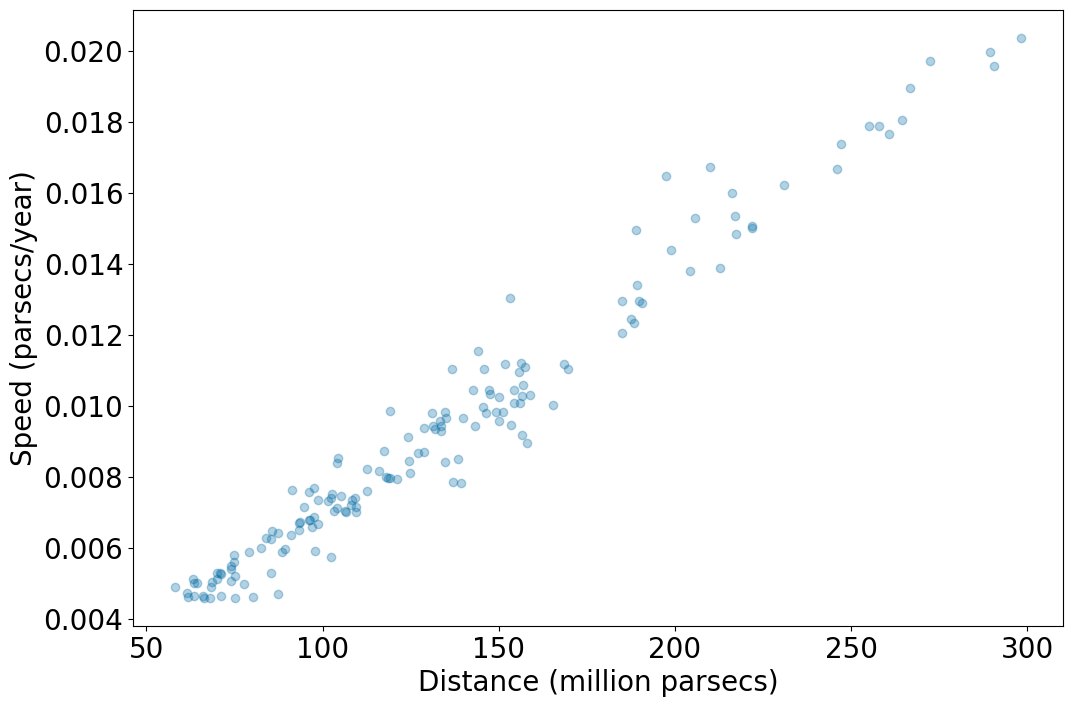

In [28]:
fig = plt.figure()
plt.scatter(df.values[:, 0], df.values[:, 1], alpha=0.3) # Esse alpha define transparência dos pontos
plt.xlabel('Distance (million parsecs)')
plt.ylabel('Speed (parsecs/year)')
fig.show()

O resultado de uma regressão nos dados acima pode ser utilizada para estimar a idade do universo. Para entender como podemos fazer isso, vamos dar um exemplo. Um carro com alguns colegas seus partiu do ICEx. Um carro partiu da sua localização com uma velocidade de 80 km/h. Depois um tempo, um conhecido seu que está dentro do carro liga para você indicando que os passageiros já percorreram 160km. Com base nesta resposta, você consegue estimar que seus colegas partiram do ICEx 2h atrás.

A mesma ideia acima é utilizada para estimar a idade do universo. Cada supernova está viajando com uma velocidade razoavelmente constante. Podemos assumir que todas as estrelas partiram de um mesmo local, afinal o vetor da trajetória também é razoavelmente constante. Agora, obviamente não observamos as estrelas do local do big bang. Estamos mensurando a velocidade das mesmas e a distância em relação ao planeta Terra.

Um fator interessante é que a correlação não muda ao somar uma constante nos eixos. Lembre-se da z-normalização. A dispersão abaixo captura a mesma tendência da dispersão acima.

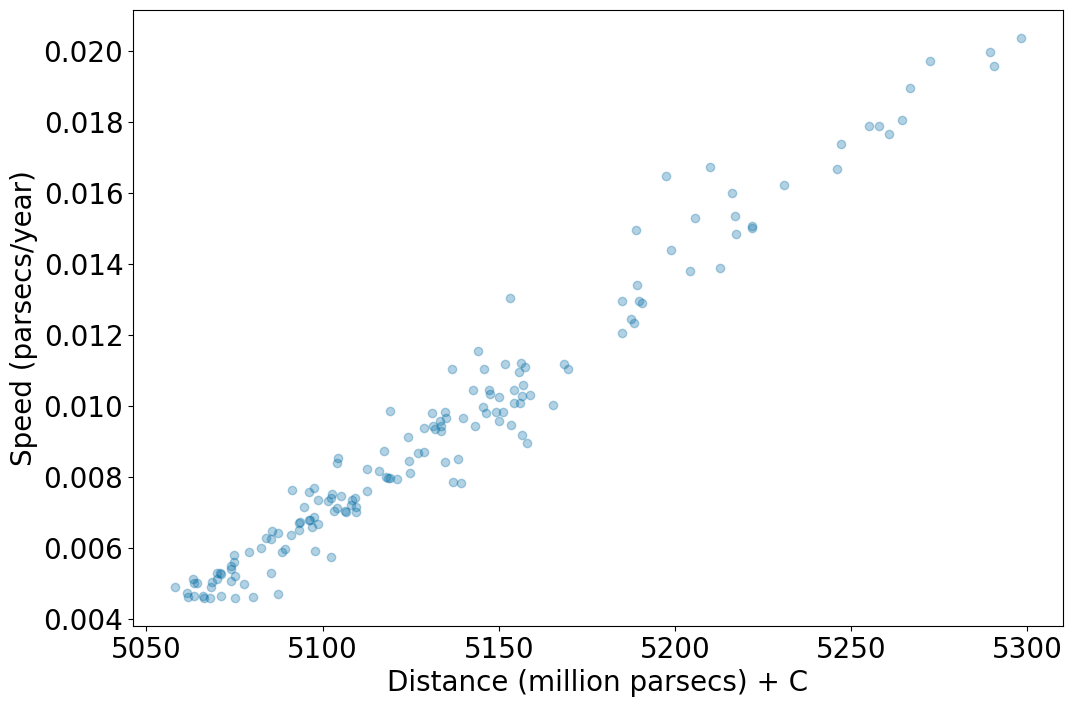

In [29]:
C = 5000 # constante
plt.scatter(df.values[:, 0] + C, df.values[:, 1], alpha=0.3)
plt.xlabel('Distance (million parsecs) + C')
plt.ylabel('Speed (parsecs/year)')
plt.show()

Agora, pense em uma regressão linear como uma média de linhas. Para cada linha, temos a fórmula:

$$y_i = \beta x_i + \alpha$$

Partindo de uma origem (0, 0), cada linha é definida por $\Delta_y/\Delta_x$. Neste caso, temos que $\alpha=0$ e $\beta=(y-0)/(x-0)$, ou $y/x$.

Nos seus dados da supernova, y é a velocidade e x é a distância. Sabendo também que a correlação não muda quando adicionamos uma constante nos dados, podemos estimar a idade do universo observando os dados a partir do planeta Terra. Assumindo que todas as supernovas partiram de uma mesma origem, temos que $\Delta_y/\Delta_x$ = ${parsecs \over time} * {1.0\over 1M*parsecs}$ = ${1 \over 1M time}$. Então: 1.0/$\beta$ = 1M time.


Sabendo da informação acima, vamos brincar um pouco com a regressão linear. Inicialmente, vamos estimar a reta:

$$y_i = \beta x_i + \alpha$$

fazendo uso de gradiente descendente.

**Exercício 2 (sem correção automática):** Para ajudar no algoritmo, z-normalize seus dados e plote novamente a dispersão dos dados z-normalizados.

In [30]:
def z_norm(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)

    z_normalized = dataset.copy()

    z_normalized = (dataset - mu) / sigma

    z_normalized = np.where(sigma == 0, 0, z_normalized)

    if isinstance(dataset, pd.DataFrame):
        z_normalized = pd.DataFrame(z_normalized, columns=dataset.columns, index=dataset.index)

    return z_normalized

Text(0, 0.5, 'Speed (parsecs/year)')

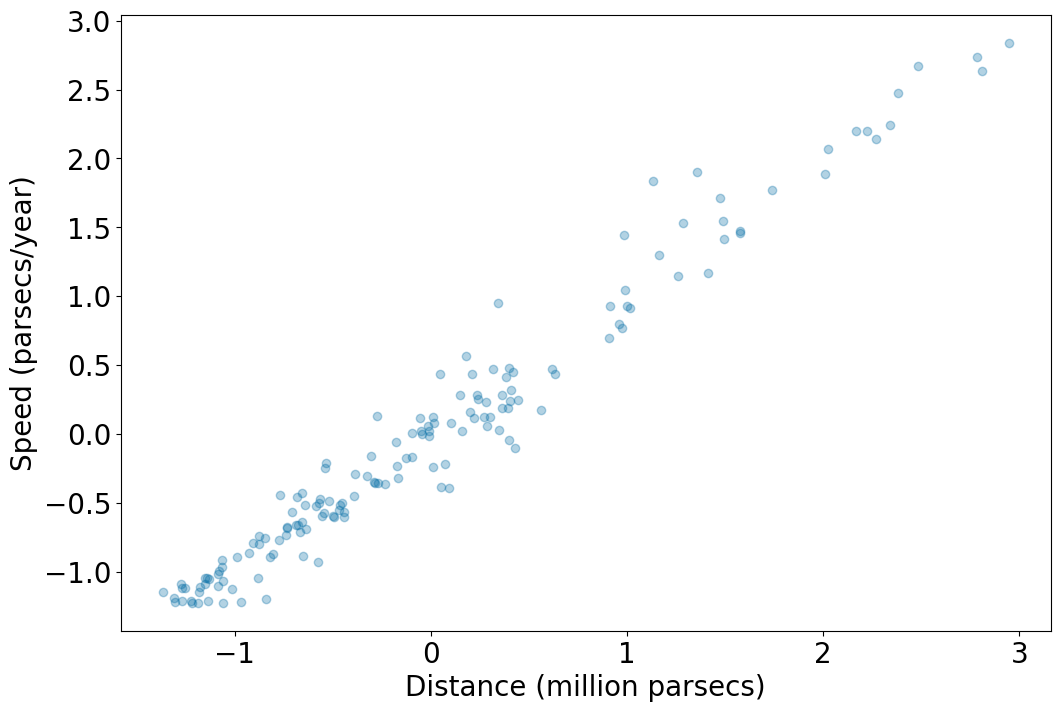

In [31]:
df = z_norm(df)

plt.scatter(df.values[:, 0], df.values[:, 1], alpha=0.3)
plt.xlabel('Distance (million parsecs)')
plt.ylabel('Speed (parsecs/year)')

**Exercício 3:** Implemente uma função de perda que retorna o erro quadrático para um ponto.

In [32]:
def loss_um_ponto(x_i, y_i, alpha, beta):
  error_i = y_i - beta * x_i - alpha
  return error_i ** 2

**Exercício 4:** Considerando a função de perda definida anteriormente, implemente a função de gradiente para um ponto, retornando uma lista com os valores dos gradientes para $\alpha$ e $\beta$, nessa ordem.

In [33]:
def gradient(x_i, y_i, alpha, beta):
  # previsto
  y_previsto = alpha + beta * x_i

  # erro de previsão
  erro_previsao = y_previsto - y_i

  # gradiente para alfa
  da = 2 * erro_previsao

  # gradiente para beta
  db = 2 * x_i * erro_previsao

  return [da, db]

**Exercício 5:** Por fim, implemente a função de gradiente descendente para os parâmetros $\alpha$ e $\beta$ da regressão linear, utilizando as duas funções criadas anteriormente.

Retorne uma lista com os valores de $\alpha$ (intercepto) e $\beta$ (inclinação), nessa ordem.

__Dica:__ obtenha os gradientes para cada ponto, some gradientes para cada parâmetro ($\alpha$ e $\beta$), e só então atualize os valores de acordo com a taxa de aprendizado.

In [34]:
import random

def descent(x, y, param, lambda_=0.0001, niter=200000):
    alpha = param[0]
    beta = param[1]

    N = len(x)

    for i in range(niter):
        rand_index = random.randint(0, N - 1)
        x_i = x[rand_index]
        y_i = y[rand_index]

        da, db = gradient(x_i, y_i, alpha, beta)

        alpha = alpha - lambda_ * da
        beta = beta - lambda_ * db

    return [alpha, beta]

In [35]:
from numpy.testing import assert_almost_equal
[alpha, beta] = descent(df.values[:, 0], df.values[:, 1], [1, 1])

assert_almost_equal(alpha, 0.0, 2)
assert_almost_equal(beta, 0.982, 2)

Até o momento, vocês implementaram um grandiente descendente calculando o gradiente um ponto de cada vez.
Em python, essa não é a forma mais eficiente de se fazer isso.

**Exercício 6:** Implementem uma nova versão da função de gradiente descendente, dessa vez realizando as operações de forma vetorial, ao invés de um ponto de cada vez.

In [36]:
def descent_vec(x, y, param, lambda_=0.0001, niter=30000):
  # x,y : dados
  # param : lista com valores iniciais para alpha e beta
  # lambda_ : taxa de aprendizado
  # niter : número de iterações do gradiente descendente
  # obtem os parâmetros iniciais (alpha e beta)
    alpha = param[0]
    beta = param[1]

    N = len(x)

    for i in range(niter):
        y_previsto = alpha + beta * x

        erro_vetor = y_previsto - y

        da = (2 / N) * np.sum(erro_vetor)

        db = (2 / N) * np.sum(x * erro_vetor)

        alpha = alpha - lambda_ * da
        beta = beta - lambda_ * db

    return [alpha, beta]

In [37]:
theta = descent_vec(df.values[:, 0], df.values[:, 1], [1, 1])
[alpha, beta] = theta
assert_almost_equal(alpha, 0.0, 2)
assert_almost_equal(beta, 0.982, 2)

* Vamos visualizar o modelo de regressão obtido. Utilizando a função abline abaixo, gere um gráfico com a reta de regressão linear sobre a dispersão dos dados z-normalizados.

In [38]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

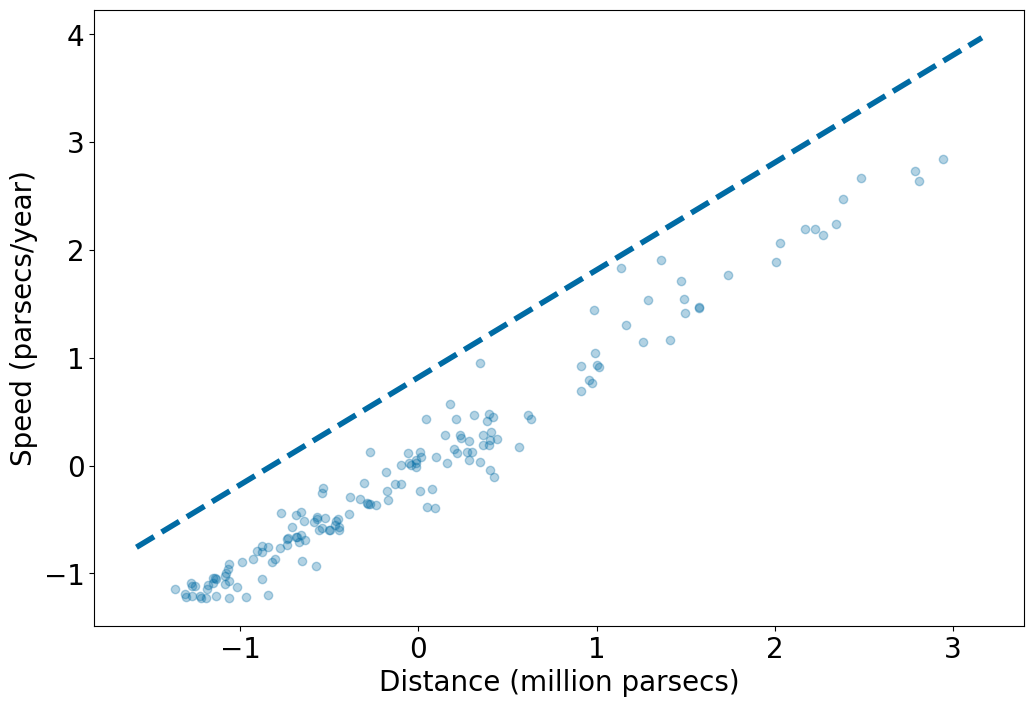

In [39]:
def plot_regression(x, y, param, lambda_, niter):
    # x,y : dados
    # param : lista com valores iniciais para alpha e beta
    # lambda_ : taxa de aprendizado
    # niter : número de iterações do gradiente descendente

    alpha, beta = descent_vec(df.values[:, 0], df.values[:, 1], param, lambda_, niter)
    plt.scatter(df.values[:, 0], df.values[:, 1], alpha=0.3)
    abline(beta,alpha)
    plt.xlabel('Distance (million parsecs)')
    plt.ylabel('Speed (parsecs/year)')

plot_regression(df.values[:, 0], df.values[:, 1], [1, 1], 0.0001, 1000)

Agora vamos tentar avaliar o modelo de regressão linear obtido com o gradiente descendente.

**Exercício 7:** Primeiro, implemente uma função que calcule o valor da soma total dos quadrados dada por:

$$\sum_i (y_i - \bar{y})^2$$


In [40]:
def sst(y):
  y_mean = np.mean(y)
  sst_value = np.sum((y - y_mean)*(y - y_mean))

  return sst_value

In [41]:
soma_quadrados = sst(df.values[:, 1])
assert_equal(round(soma_quadrados, 4), 156)

Para calcular a soma dos erros quadráticos, primeiro precisamos ter uma previsão para os valores de velocidade das supernovas.

**Exercício 8:** Implemente uma função que obtenha os valores previstos de velocidade a partir da distância, de acordo com o modelo de regressão linear ($\alpha$ e $\beta$).

In [42]:
def predict(x, param):
  # x : array de distancias das supernovas
  # param : lista com os valores dos parâmetros alpha e beta
  alpha = param[0]
  beta = param[1]
  y_previsto = alpha + beta * x

  return y_previsto

In [43]:
preds = predict(df.values[:, 0], theta)
assert_almost_equal(round(preds.mean()), 0)

**Exercício 9:** Agora implemente uma função que calcule o valor da soma dos erros quadráticos dada por:

$$\sum_i (y_i - \hat{y}_i)^2$$

In [44]:
def sse(x, y, param):
  y_previsto = predict(x, param)
  erro = y - y_previsto
  sse_value = np.sum(erro ** 2)

  return sse_value

In [45]:
soma_quadrados = sse(df.values[:, 0], df.values[:, 1], theta)
assert_almost_equal(soma_quadrados, 5.53, 2)

**Exercício 10:** Finalmente, implemente a função que calcula o coeficiente de determinação (R-quadrado, $R^2$).

Avalie se o valor de $R^2$ obtido condiz com a qualidade do modelo observada no gráfico da regressão.

In [46]:
def r2(x, y, param):
  sse_value = sse(x, y, param)
  sst_value = sst(y)

  if sst_value == 0:
      return 1.0  # Se a variância total for zero, o modelo é perfeito

  r2_value = 1 - (sse_value / sst_value)

  return r2_value

In [47]:
rsquared = r2(df.values[:, 0], df.values[:, 1], theta)
assert_almost_equal(rsquared, 0.9645, 4)

**Exercício 11:** Com os resultados acima, compute a idade do universo. Estime a mesma em bilhões de anos. Deve ser algo perto de 13 ou 14 a resposta. Você tem que usar os dados não normalizados. Use o valor de $\beta$ da regressão. Lembre-se que:

$$\beta = {r_{xy} s_y \over s_x}$$

Os desvios são não normalizados. O r pode ser o mesmo que você achou antes. Lembre-se que: a correlação é invariante nas operações de translação e escala (normalização). Porém, a unidade do beta nos dados normalizados não é a mesma dos dados originais. O beta nos dados originais, estimado com a equação acima, corrige isto.

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/close_novas.csv')
x = df.values[:, 0]
y = df.values[:, 1]

def idade_universo(sd_x, sd_y):
    r_xy = np.corrcoef(x, y)[0, 1]

    beta_original = r_xy * (sd_y / sd_x)

    idade_milhoes_anos = 1 / beta_original

    idade_bilhoes_anos = idade_milhoes_anos / 1000

    return idade_bilhoes_anos

In [49]:
age = idade_universo(x.std(ddof=1), y.std(ddof=1))

assert_almost_equal(age, 14.61, 2)